<a href="https://www.kaggle.com/code/sahilr05/fifa-womens-world-cup-eda?scriptVersionId=106223217" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-womens-world-cup-stats/womens-world-cup.csv


In [2]:
data = pd.read_csv("/kaggle/input/fifa-womens-world-cup-stats/womens-world-cup.csv")

In [3]:
pd.set_option("display.max_columns",None)
data.head(2)

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,2,1,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,8,4,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77


In [4]:
data.isnull().sum()

id                                                0
squad                                             0
year                                              0
players                                           0
age                                               0
possesion                                        40
matches_played                                    0
starts                                            0
min_playing_time                                  0
minutes_played_90s                                0
goals                                             0
assists                                           0
non_penalty_goals                                 0
penalty_kicks_made                                0
penalty_kicks_attempted                           0
yellow_cards                                     74
red_cards                                        74
goals_per_90                                      0
assists_per_90                                    0
goals_plus_a

In [5]:
data.describe()

,id,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
count,136.000000,136.000000,136.000000,136.000000,96.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,62.000000,62.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,68.500000,2007.117647,17.330882,25.274265,49.252083,4.176471,45.941176,378.147059,4.200735,6.566176,3.154412,6.161765,0.404412,0.463235,2.483871,0.080645,1.375735,0.651324,2.027574,1.294265,1.946397
std,39.403892,9.159540,1.712936,1.962462,6.584783,1.298902,14.287920,122.916565,1.361780,5.764132,3.612486,5.528674,0.754038,0.859872,2.434331,0.274512,0.923320,0.633787,1.405935,0.898872,1.365997
min,1.000000,1991.000000,13.000000,18.200000,30.000000,3.000000,33.000000,240.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.750000,1999.000000,16.000000,24.275000,46.275000,3.000000,33.000000,270.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,1.000000,0.600000,0.787500
50%,68.500000,2007.000000,17.000000,25.300000,49.400000,4.000000,44.000000,360.000000,4.000000,5.000000,2.000000,4.500000,0.000000,0.000000,2.000000,0.000000,1.250000,0.500000,1.750000,1.075000,1.725000
75%,102.250000,2015.000000,18.000000,26.800000,53.350000,5.000000,55.000000,480.000000,5.300000,10.000000,5.000000,9.000000,1.000000,1.000000,4.000000,0.000000,1.947500,1.000000,3.000000,1.800000,3.000000
max,136.000000,2019.000000,23.000000,29.700000,63.000000,7.000000,77.000000,690.000000,7.700000,25.000000,17.000000,25.000000,4.000000,4.000000,8.000000,1.000000,4.690000,2.430000,6.750000,4.500000,6.560000


Fill null value 

<AxesSubplot:>

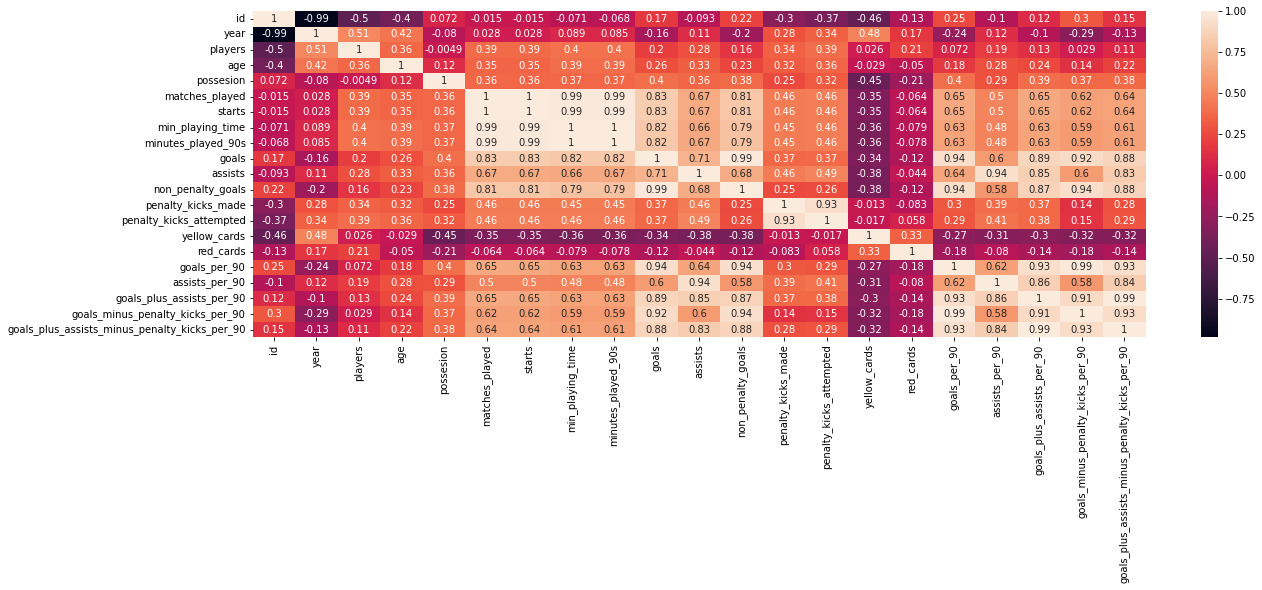

In [6]:
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(),annot=True)

In [7]:
data["possesion"].fillna(0,inplace=True)

In [8]:
data["yellow_cards"].fillna(0,inplace=True)
data["red_cards"].fillna(0,inplace=True)

<AxesSubplot:xlabel='year', ylabel='Count'>

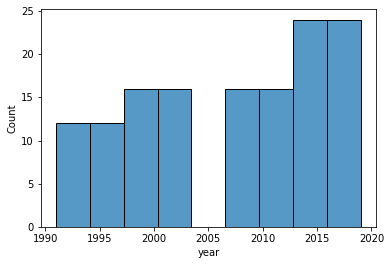

In [9]:
# We don't have 2005 year data

sns.histplot(data["year"])

Text(0.5, 1.0, 'Players in year')

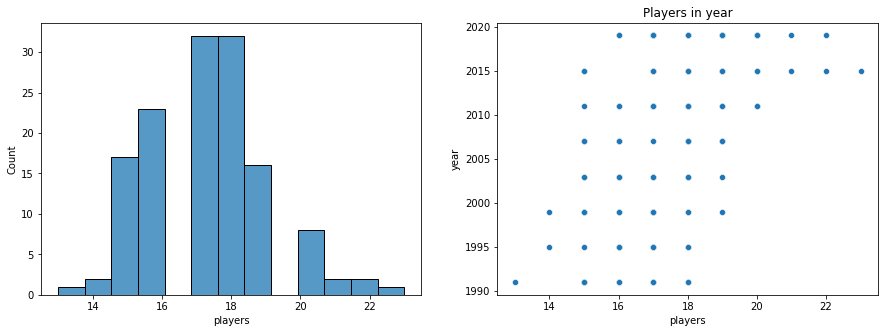

In [10]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data["players"],ax=ax[0])
sns.scatterplot(x = data["players"],y = data["year"], ax=ax[1])
plt.title("Players in year")

In [11]:
px.scatter_3d(y= data["players"],x = data["year"],color=data["year"])
import plotly.express as px
fig = px.scatter_3d(data, x='players', y='year', z='age',
                    color='players', symbol='year')
fig.show()

In [12]:
a= data.groupby(["squad"]).sum()["possesion"].sort_values(ascending=False).reset_index()
s = px.scatter(x= a["squad"], y=a["possesion"],color=a["possesion"])
s.show()

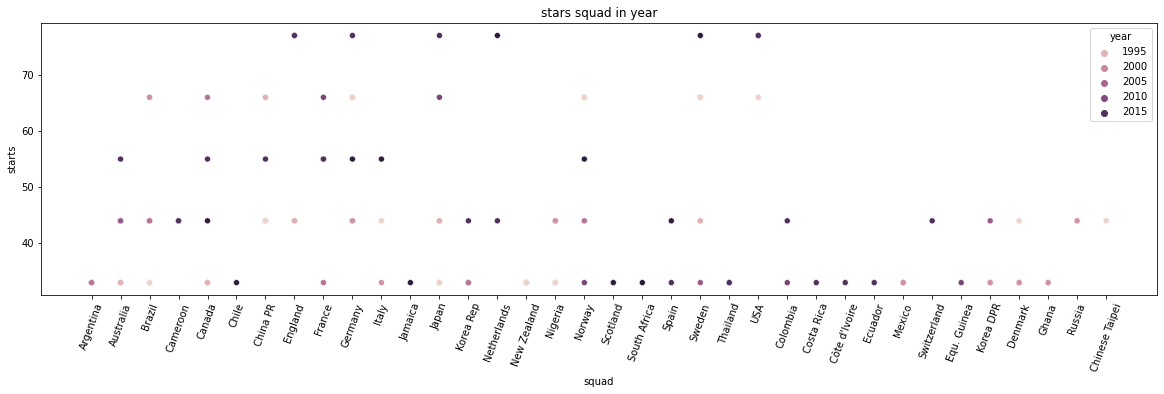

In [13]:
plt.figure(figsize=(20,5))
sns.scatterplot(data = data, y ="starts",hue="year",x="squad")
plt.xticks(rotation=70)
plt.title("stars squad in year")
plt.show()

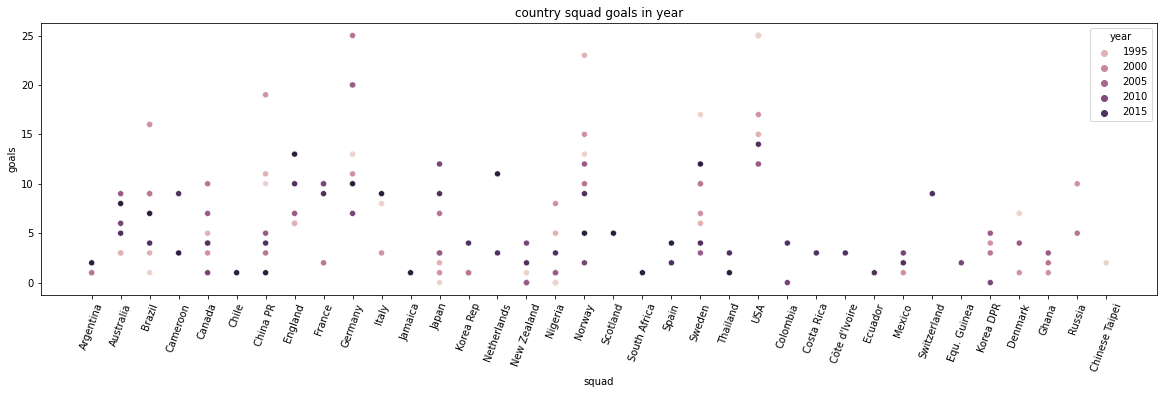

In [14]:
plt.figure(figsize=(20,5))
sns.scatterplot(y=data["goals"],hue=data["year"],x=data["squad"])
plt.xticks(rotation=70)
plt.title("country squad goals in year")
plt.show()